# Machine learning

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import missingno as msno
import seaborn as sns
from tqdm.notebook import tqdm
# from pycaret.classification import *
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from matplotlib import font_manager, rc, rcParams
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
rcParams['axes.unicode_minus'] = False
from tqdm.notebook import tqdm

## Functions

<br> 
    
- `get_outlier` : 이상치 제거 함수
- `myscore` : Score 함수
- `mycurve_auc` : AUC

In [1]:
# 이상치 제거 함수
def get_outlier(df, columns,label, weight=1.5):
    card_df_out = df
    for column in columns:
        fraud = card_df_out[card_df_out['Class']==int(label)][column]
        quantile_25 = np.percentile(fraud.values, 25)
        quantile_75 = np.percentile(fraud.values, 75)
    
        iqr = quantile_75 - quantile_25
        iqr_weight = iqr * weight
        lowest_val = quantile_25 - iqr_weight
        highest_val = quantile_75 + iqr_weight
    
        outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
        print(outlier_index)
        card_df_out.drop(outlier_index, axis=0, inplace=True)
        card_df_out = pd.DataFrame(card_df_out)
    return card_df_out

In [27]:
# Score 함수
def myscore(y_test,pred,proba, pr_curve=0, auc_curve=0):
    hist=[]
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    auc = roc_auc_score(y_test, proba[:,-1])
    print("Accuracy:{:.6f}  precision:{:.6f}, recall:{:.6f}, f1:{:.6f}, auc:{:.6f}".format(accuracy, precision, recall, f1, auc))
    hist.append([accuracy, precision, recall, f1, auc])
    mtx = confusion_matrix(y_test, pred)
    print(mtx)
    
#     if pr_curve==1:
#         mycurve(y_test, proba)
    if auc_curve==1:
        mycurve_auc(y_test, proba)
    
    return hist

In [28]:
# AUC curve (for threshold)
def mycurve_auc(y_test, proba):  
    fpr, tpr, thresholds = roc_curve(y_test, proba[:,-1])
    print(len(fpr), len(tpr), len(thresholds))  #66 66 65
    plt.plot(fpr, tpr, label="roc")
    plt.plot([0,1], [0,1], label="th:0.5")
    plt.xlabel("FPR (1-TNR(specificity)")      #FP
    plt.ylabel("TPR (recall,sensitivity)") #TP
    plt.title(f"auc : {roc_auc_score(y_test, proba[:,-1]):.4f}")
    plt.grid()
    plt.legend()
    plt.show()

# Modeling


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from lightgbm import LGBMClassifier

## 1. 원본데이터로 모델링

<br>

- Decision Tree + GridSearchCV
- LogisticRegression
- LightGBM

In [16]:
# 데이터 불러오기
card_df = pd.read_csv('./미니프로젝트/creditcard.csv')

# X, y
x_data = card_df.iloc[:,:-1]
y_data = card_df.iloc[:,-1]

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

### Desicion Tree

Accuracy:0.999175  precision:0.786517, recall:0.714286, f1:0.748663, auc:0.856976
[[56845    19]
 [   28    70]]
3 3 3


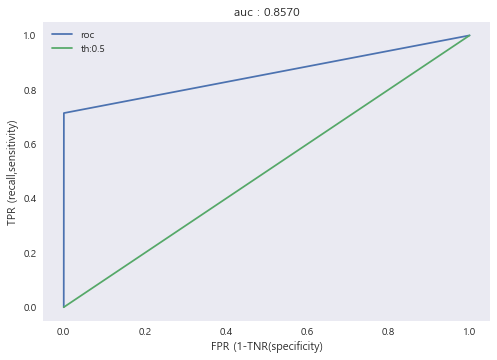

In [29]:
# NonGrid
dt = DecisionTreeClassifier(random_state = 36)
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
proba_dt = dt.predict_proba(x_test)
hist_dt = myscore(y_test, pred_dt, proba_dt, pr_curve=1, auc_curve=1)
hist_dt.insert(0,'hist_dt')

C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. 

C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. 

C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. 

C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.86173307 0.86173307        nan 0.89097624 0.89097624
        nan 0.92457013 0.92457013]
  warnings.warn(


0.9245701335220072
DecisionTreeClassifier(max_depth=5, random_state=36)
{'max_depth': 5, 'min_samples_split': 2}
F1 : 0.896485
Accuracy:0.999350  precision:0.876543, recall:0.724490, f1:0.793296, auc:0.882445
[[56854    10]
 [   27    71]]
11 11 10


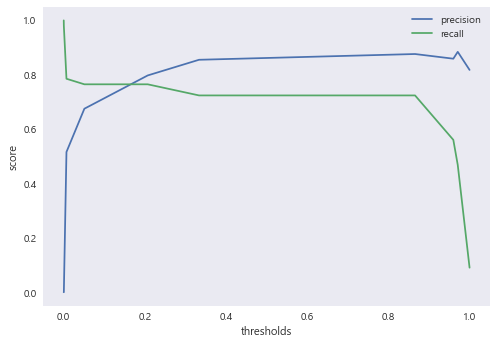

11 11 11


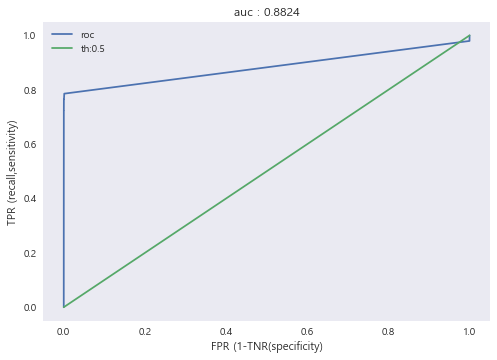

In [17]:
# GridSearch

#cross_val_score +  param_grid(튜닝) / refit=True(best모델반영)
# depth가 깊어질수록 결정트리는 과적합되기 쉬워 예측 성능이 저하될 수 있다
# min_samples_split 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가
myparam = {'max_depth':[1,3,5], 'min_samples_split':[1,2,3]}
GCV_model = GridSearchCV(DecisionTreeClassifier(random_state=36), param_grid=myparam, refit=True, cv=10, scoring='f1_macro',verbose=0)
GCV_model.fit(x_train, y_train)

#{'max_depth': 5, 'min_samples_split': 2}
print(GCV_model.best_score_)
print(GCV_model.best_estimator_)
print(GCV_model.best_params_)

pred = GCV_model.predict(x_test)  
df_score = f1_score(y_test, pred, average='macro')
print("F1 : {:.6f}".format(df_score))


proba = GCV_model.predict_proba(x_test)
hist_g_dt = myscore(y_test, pred, proba, pr_curve=1, auc_curve=1)
hist_g_dt.insert(0,'hist_g_dt')
#DT Grid Accuracy:0.999350  precision:0.876543, recall:0.724490, f1:0.793296, auc:0.882445

### LogisticRegression
- GridSearch를 사용하지 않았을 때와 사용했을 때의 성능 차이는 크지 않았다.

C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:0.998841  precision:0.686047, recall:0.602041, f1:0.641304, auc:0.876686
[[56837    27]
 [   39    59]]
186 186 186


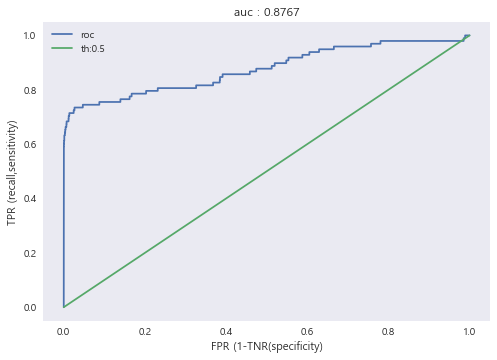

In [30]:
# NonGrid

lr = LogisticRegression(random_state = 36)
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
proba_lr = lr.predict_proba(x_test)
hist_lr = myscore(y_test, pred_lr, proba_lr, pr_curve=1, auc_curve=1)
hist_lr.insert(0,'hist_lr')

C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\l

C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

0.8528344541367525
LogisticRegression(C=10, random_state=36)
{'C': 10, 'penalty': 'l2'}
F1 : 0.817157
Accuracy:0.998789  precision:0.659341, recall:0.612245, f1:0.634921, auc:0.875673
[[56833    31]
 [   38    60]]
56158 56158 56157


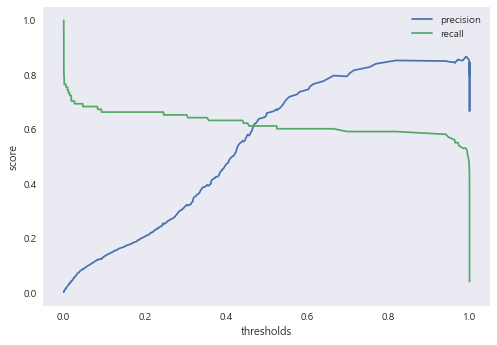

183 183 183


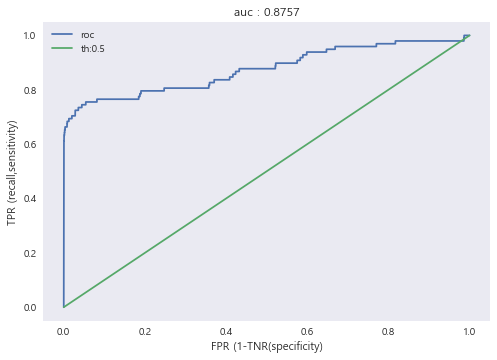

In [18]:
# GridSearch
lr = LogisticRegression(random_state =36)
#cross_val_score +  param_grid(튜닝) / refit=True(best모델반영)
# depth가 깊어질수록 결정트리는 과적합되기 쉬워 예측 성능이 저하될 수 있다
# min_samples_split 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가
myparam = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}
GCV_model = GridSearchCV(lr, param_grid=myparam, refit=True, cv=10, scoring='f1_macro',verbose=0)
GCV_model.fit(x_train, y_train)

print(GCV_model.best_score_)
print(GCV_model.best_estimator_)
print(GCV_model.best_params_)

pred = GCV_model.predict(x_test)  
df_score = f1_score(y_test, pred, average='macro') 
print("F1 : {:.6f}".format(df_score))


proba = GCV_model.predict_proba(x_test)
hist_g_lr = myscore(y_test, pred, proba, pr_curve=1, auc_curve=1)
hist_g_lr.insert(0,'hist_g_lr')
#Grid lr Accuracy:0.998806  precision:0.670455, recall:0.602041, f1:0.634409, auc:0.876663

### LightGBM

Accuracy:0.999421  precision:0.922078, recall:0.724490, f1:0.811429, auc:0.969686
[[56858     6]
 [   27    71]]
5653 5653 5653


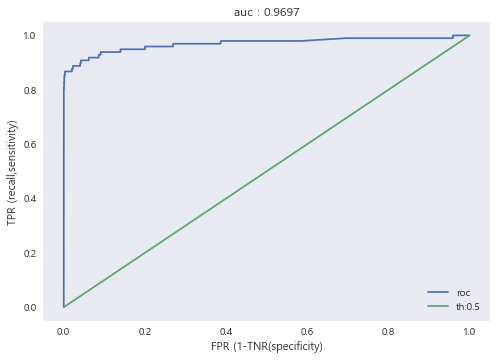

In [31]:
#lgbm
lgbm = LGBMClassifier(boost_from_average=False)
lgbm.fit(x_train, y_train)
pred_dt = lgbm.predict(x_test)
proba_dt = lgbm.predict_proba(x_test)
hist_lb = myscore(y_test, pred_dt, proba_dt, pr_curve=1, auc_curve=1)
hist_lb.insert(0,'hist_lb')
#Accuracy:0.999438  precision:0.923077, recall:0.734694, f1:0.818182ㅠ, auc:0.968107

In [22]:
# 성능 비교
print('[정확도, 정밀도, 재현율, f1점수, auc]')
print(hist_g_dt)    # Decision Tree + Grid
print(hist_g_lr)    # Logistic Regression + Grid
print(hist_lr)      # Logistic Regression
print(hist_dt)      # Decision Tree
print(hist_lb)      # LightGBM

['hist_g_dt', [0.9993504441557529, 0.8765432098765432, 0.7244897959183674, 0.793296089385475, 0.882445440894422]]
['hist_g_lr', [0.9987886661282961, 0.6593406593406593, 0.6122448979591837, 0.6349206349206349, 0.8756731061867629]]
['hist_lr', [0.9988413328183702, 0.686046511627907, 0.6020408163265306, 0.641304347826087, 0.876685905791692]]
['hist_dt', [0.9991748885221726, 0.7865168539325843, 0.7142857142857143, 0.7486631016042781, 0.8569757918642978]]
['hist_lb', [0.999420666409185, 0.922077922077922, 0.7244897959183674, 0.8114285714285714, 0.9696863551273068]]


## 2. Log Amount
- `Amount` 피처에 Log Transfrom를 진행한 후 성능을 비교.

In [35]:
# 데이터 불러오기
card_df = pd.read_csv('./미니프로젝트/creditcard.csv')

In [36]:
# Amount 컬럼에 Log Transform을 적용 후 L_am 컬럼을 생성 후 저장.
log_am = np.log1p(card_df['Amount'])
card_df.insert(30, 'L_am', log_am)

In [37]:
# 기존 Amount 컬럼 제거
card_df.drop(["Amount"], inplace=True, axis=1)

In [38]:
# x, y
x_data = card_df.iloc[:,:-1]
y_data = card_df.iloc[:,-1]

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:0.999175  precision:0.814815, recall:0.673469, f1:0.737430, auc:0.920827
[[56849    15]
 [   32    66]]
172 172 172


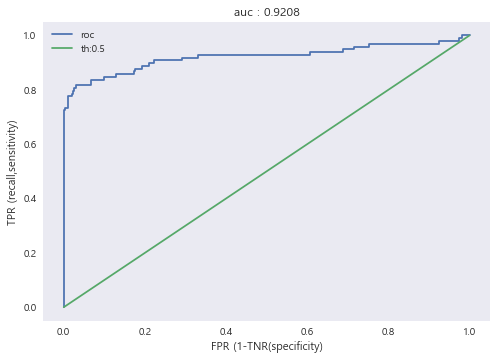

In [39]:
# LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
proba_lr = lr.predict_proba(x_test)
hist_log_lr = myscore(y_test, pred_lr, proba_lr, pr_curve=1, auc_curve=1)
hist_log_lr.insert(0,'hist_log_lr')
#Accuracy:0.999175  precision:0.814815, recall:0.673469, f1:0.737430, auc:0.920800

Accuracy:0.999421  precision:0.922078, recall:0.724490, f1:0.811429, auc:0.969686
[[56858     6]
 [   27    71]]
5653 5653 5653


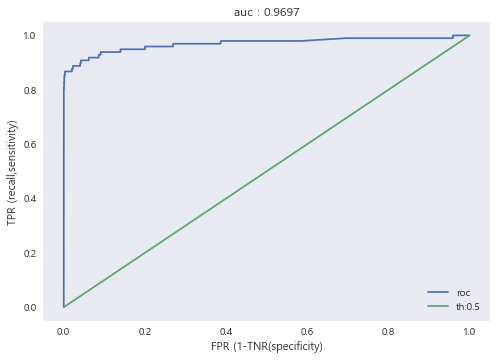

In [40]:
# LightGBM
lgbm = LGBMClassifier(boost_from_average=False)
lgbm.fit(x_train, y_train)
pred_dt = lgbm.predict(x_test)
proba_dt = lgbm.predict_proba(x_test)
hist_log_lb = myscore(y_test, pred_dt, proba_dt, pr_curve=1, auc_curve=1)
hist_log_lb.insert(0,'hist_log_lb')

In [50]:
print('[정확도, 정밀도, 재현율, f1점수, auc]')
print(hist_lr)        # Logistic Regression
print()
print(hist_lb)        # LightGBM
print()
print(hist_log_lr)    # Regression + Log Transform
print()
print(hist_log_lb)    #LightGBM + Log Transform

['hist_lr', [0.9988413328183702, 0.686046511627907, 0.6020408163265306, 0.641304347826087, 0.876685905791692]]

['hist_lb', [0.999420666409185, 0.922077922077922, 0.7244897959183674, 0.8114285714285714, 0.9696863551273068]]

['hist_log_lr', [0.9991748885221726, 0.8148148148148148, 0.673469387755102, 0.7374301675977653, 0.9208273876517405]]

['hist_log_lb', [0.999420666409185, 0.922077922077922, 0.7244897959183674, 0.8114285714285714, 0.9696863551273068]]


## 3. Time 제거
- `Time` 컬럼을 제거한 후 성능 비교.

In [43]:
# 데이터 불러오기
card_df = pd.read_csv('./미니프로젝트/creditcard.csv')

In [44]:
# Time 컬럼 제거
card_df.drop(["Time"], inplace=True, axis=1)

In [45]:
# x, y
x_data = card_df.iloc[:,:-1]
y_data = card_df.iloc[:,-1]

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:0.999017  precision:0.776316, recall:0.602041, f1:0.678161, auc:0.949527
[[56847    17]
 [   39    59]]
918 918 918


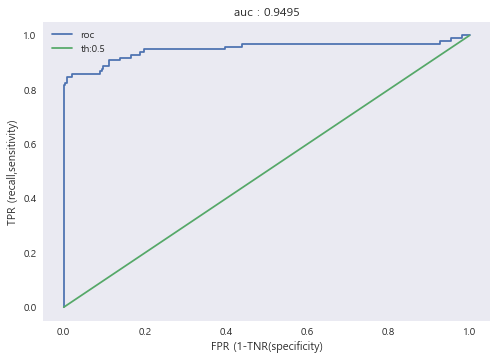

In [46]:
# Logisitic Regression
lr = LogisticRegression(random_state = 0)
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
proba_lr = lr.predict_proba(x_test)
hist_t_lr = myscore(y_test, pred_lr, proba_lr, pr_curve=1, auc_curve=1)
hist_t_lr.insert(0,'hist_t_lr')
#Accuracy:0.999192  precision:0.861111, recall:0.632653, f1:0.729412, auc:0.966588

Accuracy:0.999473  precision:0.947368, recall:0.734694, f1:0.827586, auc:0.968201
[[56860     4]
 [   26    72]]
5082 5082 5082


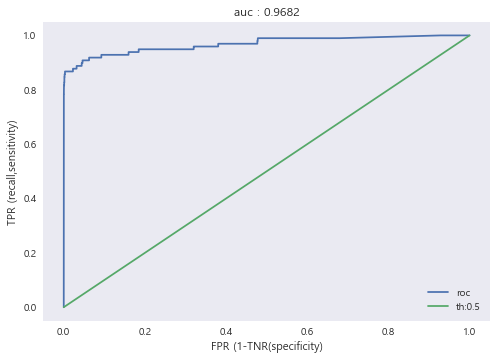

In [47]:
# LightGBM
lgbm = LGBMClassifier(boost_from_average=False)
lgbm.fit(x_train, y_train)
pred_dt = lgbm.predict(x_test)
proba_dt = lgbm.predict_proba(x_test)
hist_t_lb = myscore(y_test, pred_dt, proba_dt, pr_curve=1, auc_curve=1)
hist_t_lb.insert(0,'hist_t_lb')

In [51]:
print('[정확도, 정밀도, 재현율, f1점수, auc]')
print(hist_lr)        # Logistic Regression
print()
print(hist_lb)        # LightGBM
print()
print(hist_t_lr)      # Regression + Time remove
print()
print(hist_t_lb)      # LightGBM + Time remove

['hist_lr', [0.9988413328183702, 0.686046511627907, 0.6020408163265306, 0.641304347826087, 0.876685905791692]]

['hist_lb', [0.999420666409185, 0.922077922077922, 0.7244897959183674, 0.8114285714285714, 0.9696863551273068]]

['hist_t_lr', [0.9990168884519505, 0.7763157894736842, 0.6020408163265306, 0.6781609195402298, 0.9495267261378384]]

['hist_t_lb', [0.9994733330992591, 0.9473684210526315, 0.7346938775510204, 0.8275862068965517, 0.9682005328861989]]


## 4. Time 제거 Amount Log화
- `Time` 컬럼 제거 및 `Amount` 컬럼을 Log Transform 후 성능을 비교.

In [52]:
# 데이터 불러오기
card_df = pd.read_csv('./미니프로젝트/creditcard.csv')

In [53]:
# Amount 컬럼 Log Transform -> L_am 생성
log_am = np.log1p(card_df['Amount'])
card_df.insert(30, 'L_am', log_am)

# Amount, Time 제거
card_df.drop(["Amount"], inplace=True, axis=1)
card_df.drop(['Time'], inplace=True,axis=1)

In [54]:
# x, y 
x_data = card_df.iloc[:,:-1]
y_data = card_df.iloc[:,-1]

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

Accuracy:0.999192  precision:0.861111, recall:0.632653, f1:0.729412, auc:0.966588
[[56854    10]
 [   36    62]]
919 919 919


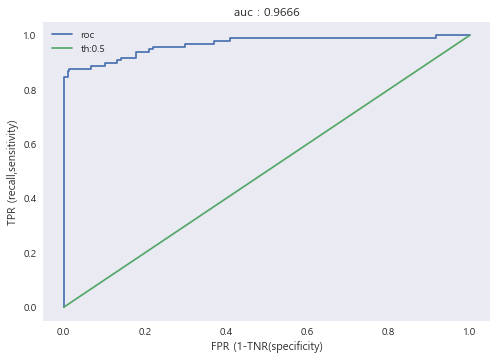

In [55]:
# Logistic Regression
lr = LogisticRegression(random_state = 0)
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
proba_lr = lr.predict_proba(x_test)
hist_tlog_lr = myscore(y_test, pred_lr, proba_lr, pr_curve=1, auc_curve=1)
hist_tlog_lr.insert(0,'hist_tlog_lr')
#Accuracy:0.999192  precision:0.861111, recall:0.632653, f1:0.729412, auc:0.966588

Accuracy:0.999473  precision:0.947368, recall:0.734694, f1:0.827586, auc:0.968201
[[56860     4]
 [   26    72]]
5082 5082 5082


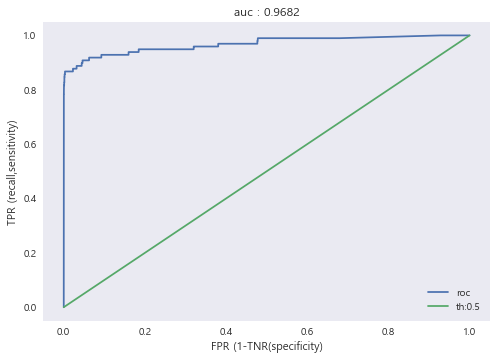

In [56]:
# LightGBM
lgbm = LGBMClassifier(boost_from_average=False)
lgbm.fit(x_train, y_train)
pred_dt = lgbm.predict(x_test)
proba_dt = lgbm.predict_proba(x_test)
hist_tlog_lb = myscore(y_test, pred_dt, proba_dt, pr_curve=1, auc_curve=1)
hist_tlog_lb.insert(0,'hist_tlog_lb')

In [57]:
print('[정확도, 정밀도, 재현율, f1점수, auc]')
print(hist_t_lr)      # Logistic Regression
print()
print(hist_t_lb)      # LightGBM
print()
print(hist_tlog_lr)   # Logistic Regression + Time remove + Log Transfrom
print()
print(hist_tlog_lb)   # LightGBM + Time remove + Log Transfrom

['hist_t_lr', [0.9990168884519505, 0.7763157894736842, 0.6020408163265306, 0.6781609195402298, 0.9495267261378384]]

['hist_t_lb', [0.9994733330992591, 0.9473684210526315, 0.7346938775510204, 0.8275862068965517, 0.9682005328861989]]

['hist_tlog_lr', [0.9991924440855307, 0.8611111111111112, 0.6326530612244898, 0.7294117647058823, 0.9665883798651705]]

['hist_tlog_lb', [0.9994733330992591, 0.9473684210526315, 0.7346938775510204, 0.8275862068965517, 0.9682005328861989]]


## 5. T 제거 log화 이상치 
- `Time` 제거, `Amount` ㅣog Transform, 그리고 이상치를 제거한 후 성능 비교
- 이상치는 `Class = 0 : 사기 x`인 데이터의 이상치를 모두 제거  
 -> boxplot에 근거 이상치가 지나치게 많음


In [61]:
# 데이터 불러오기 
card_df = pd.read_csv('./미니프로젝트/creditcard.csv')

In [62]:
# Time 제거 
card_df.drop(['Time'], inplace=True,axis=1)

# 컬럼 리스트
card_df_columns = list(card_df.columns[:-1])
card_df_columns

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [63]:
# 이상치 제거
card_df = get_outlier(card_df,card_df_columns,0,2.0)

Int64Index([    18,    164,    290,   1158,   1632,   2178,   2464,   2682,
              2792,   2954,
            ...
            284479, 284516, 284517, 284536, 284561, 284631, 284649, 284772,
            284795, 284802],
           dtype='int64', length=4309)
Int64Index([    85,     89,    146,    174,    210,    225,    249,    401,
               450,    468,
            ...
            284426, 284434, 284447, 284448, 284476, 284496, 284497, 284528,
            284610, 284713],
           dtype='int64', length=5556)
Int64Index([  8464,  10036,  10644,  11374,  11738,  12975,  13034,  13115,
             13129,  13160,
            ...
            278901, 279411, 279629, 280949, 281787, 281789, 283149, 283315,
            283630, 284453],
           dtype='int64', length=252)
Int64Index([    83,    180,    351,    513,    608,    858,   2039,   2043,
              2170,   4018,
            ...
            284645, 284646, 284652, 284669, 284711, 284712, 284738, 284745,
            2

In [64]:
# Amount Log Transform
log_am = np.log1p(card_df['Amount'])
card_df.insert(29, 'L_am', log_am)
card_df.drop(["Amount"], inplace=True, axis=1)

In [66]:
# x, y
x_data = card_df.iloc[:,:-1]
y_data = card_df.iloc[:,-1]

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

Accuracy:0.999852  precision:1.000000, recall:0.948980, f1:0.973822, auc:0.992026
[[33592     0]
 [    5    93]]
561 561 561


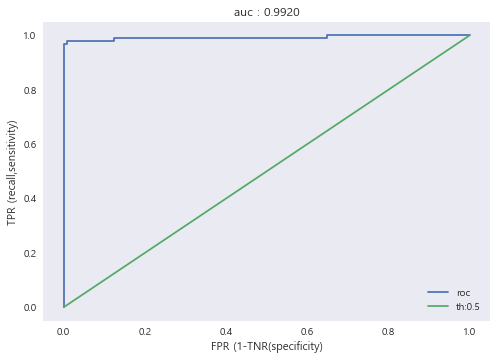

In [67]:
# Logistic Regression
lr = LogisticRegression(random_state = 0)
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
proba_lr = lr.predict_proba(x_test)
hist_tlogs_lr = myscore(y_test, pred_lr, proba_lr, pr_curve=1, auc_curve=1)
hist_tlogs_lr.insert(0,'hist_tlogs_lr')
#Accuracy:0.999192  precision:0.861111, recall:0.632653, f1:0.729412, auc:0.966588

Accuracy:0.999763  precision:1.000000, recall:0.918367, f1:0.957447, auc:0.993115
[[33592     0]
 [    8    90]]
2070 2070 2070


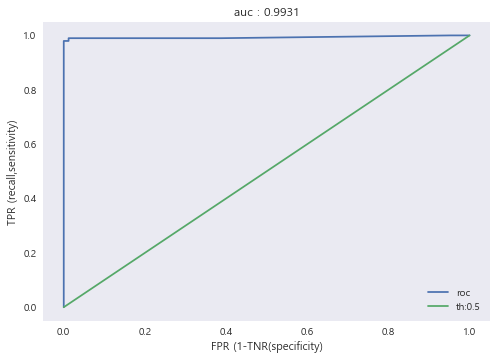

In [68]:
# LightGBM
lgbm = LGBMClassifier(boost_from_average=False)
lgbm.fit(x_train, y_train)
pred_dt = lgbm.predict(x_test)
proba_dt = lgbm.predict_proba(x_test)
hist_tlogs_lb = myscore(y_test, pred_dt, proba_dt, pr_curve=1, auc_curve=1)
hist_tlogs_lb.insert(0,'hist_tlogs_lb')

In [106]:
print('[정확도, 정밀도, 재현율, f1점수, auc]')
print(hist_tlog_lr)   # Logistic Regression + Time remove + Log Transfrom
print()
print(hist_tlog_lb)   # LightGBM + Time remove + Log Transfrom
print()
print(hist_tlogs_lr)  # Logistic Regression + Time remove + Log Transfrom + 이상치제거
print()
print(hist_tlogs_lb)  # LightGBM + Time remove + Log Transfrom # 이상치 제거

[정확도, 정밀도, 재현율, f1점수, auc]
['hist_tlog_lr', [0.9991924440855307, 0.8611111111111112, 0.6326530612244898, 0.7294117647058823, 0.9665883798651705]]

['hist_tlog_lb', [0.9994733330992591, 0.9473684210526315, 0.7346938775510204, 0.8275862068965517, 0.9682005328861989]]

['hist_tlogs_lr', [0.9998515880083111, 1.0, 0.9489795918367347, 0.9738219895287958, 0.9920255551613358]]

['hist_tlogs_lb', [0.9997625408132977, 1.0, 0.9183673469387755, 0.9574468085106383, 0.9931147053963286]]


## 6. 0 과 1 모두 이상치 제거
- 전체 데이터 이상치 제거 후 성능 비교

In [70]:
# 데이터 불러오기
card_df = pd.read_csv('./미니프로젝트/creditcard.csv')

In [71]:
# Time 제거
card_df.drop(['Time'], inplace=True,axis=1)
# 컬럼 리스트
card_df_columns = list(card_df.columns[:-1])

In [72]:
# 이상치 전체 제거
card_df = get_outlier(card_df,card_df_columns,0,2.0)
card_df = get_outlier(card_df,card_df_columns,1,2.0)

Int64Index([    18,    164,    290,   1158,   1632,   2178,   2464,   2682,
              2792,   2954,
            ...
            284479, 284516, 284517, 284536, 284561, 284631, 284649, 284772,
            284795, 284802],
           dtype='int64', length=4309)
Int64Index([    85,     89,    146,    174,    210,    225,    249,    401,
               450,    468,
            ...
            284426, 284434, 284447, 284448, 284476, 284496, 284497, 284528,
            284610, 284713],
           dtype='int64', length=5556)
Int64Index([  8464,  10036,  10644,  11374,  11738,  12975,  13034,  13115,
             13129,  13160,
            ...
            278901, 279411, 279629, 280949, 281787, 281789, 283149, 283315,
            283630, 284453],
           dtype='int64', length=252)
Int64Index([    83,    180,    351,    513,    608,    858,   2039,   2043,
              2170,   4018,
            ...
            284645, 284646, 284652, 284669, 284711, 284712, 284738, 284745,
            2

Int64Index([10690, 42700, 42756, 150660, 150661, 150687, 150697], dtype='int64')
Int64Index([  8972,   9487,   9509,  10204,  10568,  29687,  42635,  42674,
             42696,  44091,  63421,  63634,  64329,  64411,  64460,  77682,
             95597, 144754, 149145, 149600, 150662, 150663, 150684, 151730,
            151807, 152019, 153885, 167184, 167305, 189878, 231978, 272521],
           dtype='int64')
Int64Index([], dtype='int64')
Int64Index([8296, 8615, 9252, 41943, 42590, 150601], dtype='int64')
Int64Index([8335, 9035, 9179], dtype='int64')
Int64Index([150644, 150647, 150654, 150665], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([154676], dtype='int64')
Int64Index([42528], dtype='int64')
Int64Index([42473, 42549, 42609], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([   623,  23422,  74794,  81609,  94218, 107637, 108708, 141259,
            141260, 146790, 191074, 199896, 213092, 213116, 215132, 

In [73]:
# Amount Log Transfrom
log_am = np.log1p(card_df['Amount'])
card_df.insert(29, 'L_am', log_am)
card_df.drop(["Amount"], inplace=True, axis=1)

In [74]:
# x, y 
x_data = card_df.iloc[:,:-1]
y_data = card_df.iloc[:,-1]

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

Accuracy:0.999792  precision:1.000000, recall:0.847826, f1:0.917647, auc:0.990397
[[33592     0]
 [    7    39]]
579 579 579


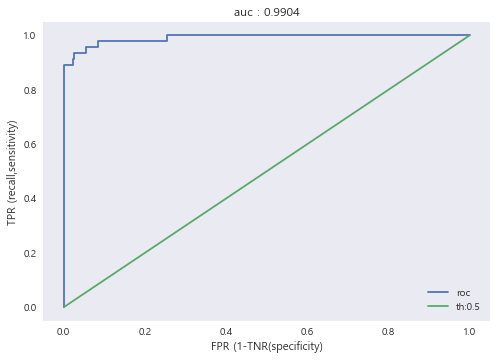

In [76]:
#Logistic Regression# 
lr = LogisticRegression(random_state = 0)
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
proba_lr = lr.predict_proba(x_test)
hist_tlogs1_lr = myscore(y_test, pred_lr, proba_lr, pr_curve=1, auc_curve=1)
hist_tlogs1_lr.insert(0,'hist_tlogs1_lr')

Accuracy:0.999762  precision:1.000000, recall:0.826087, f1:0.904762, auc:0.977888
[[33592     0]
 [    8    38]]
1920 1920 1920


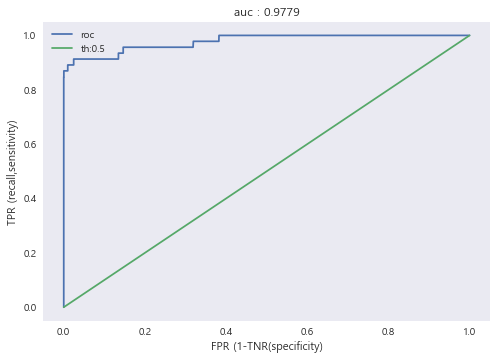

In [77]:
# LightGBM
lgbm = LGBMClassifier(boost_from_average=False)
lgbm.fit(x_train, y_train)
pred_dt = lgbm.predict(x_test)
proba_dt = lgbm.predict_proba(x_test)
hist_tlogs1_lb = myscore(y_test, pred_dt, proba_dt, pr_curve=1, auc_curve=1)
hist_tlogs1_lb.insert(0,'hist_tlogs1_lb')

In [107]:
print('[정확도, 정밀도, 재현율, f1점수, auc]')
print(hist_tlog_lr)   # Logistic Regression + Time remove + Log Transfrom
print()
print(hist_tlog_lb)   # LightGBM + Time remove + Log Transfrom
print()
print(hist_tlogs_lr)  # Logistic Regression + Time remove + Log Transfrom + 이상치제거
print()
print(hist_tlogs_lb)  # LightGBM + Time remove + Log Transfrom # 이상치 제거
print()
print(hist_tlogs1_lr) # Logistic Regression + Time remove + Log Transfrom + 이상치 전체 제거
print()
print(hist_tlogs1_lb) # LightGBM + Time remove + Log Transfrom # 이상치 전체 제거

[정확도, 정밀도, 재현율, f1점수, auc]
['hist_tlog_lr', [0.9991924440855307, 0.8611111111111112, 0.6326530612244898, 0.7294117647058823, 0.9665883798651705]]

['hist_tlog_lb', [0.9994733330992591, 0.9473684210526315, 0.7346938775510204, 0.8275862068965517, 0.9682005328861989]]

['hist_tlogs_lr', [0.9998515880083111, 1.0, 0.9489795918367347, 0.9738219895287958, 0.9920255551613358]]

['hist_tlogs_lb', [0.9997625408132977, 1.0, 0.9183673469387755, 0.9574468085106383, 0.9931147053963286]]

['hist_tlogs1_lr', [0.9997919020155777, 1.0, 0.8478260869565217, 0.9176470588235294, 0.9903969112728703]]

['hist_tlogs1_lb', [0.9997621737320888, 1.0, 0.8260869565217391, 0.9047619047619047, 0.977887786429481]]


## 7. 언더샘플링
- 이상치까지 제거한 데이터에 언더 샘플링 진행 후 성능 비교.

In [102]:
# 데이터 불러오기
card_df = pd.read_csv('./미니프로젝트/creditcard.csv')

In [103]:
# Time 컬럼 제거
card_df.drop(["Time"], inplace=True, axis=1)

# 이상치 제거
card_df = get_outlier(card_df,card_df_columns,0,2.0)


Int64Index([    18,    164,    290,   1158,   1632,   2178,   2464,   2682,
              2792,   2954,
            ...
            284479, 284516, 284517, 284536, 284561, 284631, 284649, 284772,
            284795, 284802],
           dtype='int64', length=4309)
Int64Index([    85,     89,    146,    174,    210,    225,    249,    401,
               450,    468,
            ...
            284426, 284434, 284447, 284448, 284476, 284496, 284497, 284528,
            284610, 284713],
           dtype='int64', length=5556)
Int64Index([  8464,  10036,  10644,  11374,  11738,  12975,  13034,  13115,
             13129,  13160,
            ...
            278901, 279411, 279629, 280949, 281787, 281789, 283149, 283315,
            283630, 284453],
           dtype='int64', length=252)
Int64Index([    83,    180,    351,    513,    608,    858,   2039,   2043,
              2170,   4018,
            ...
            284645, 284646, 284652, 284669, 284711, 284712, 284738, 284745,
            2

In [81]:
# Amount Log Transfrom
log_am = np.log1p(card_df['Amount'])
card_df.insert(29, 'L_am', log_am)
card_df.drop(["Amount"], inplace=True, axis=1)

In [82]:
# x, y
x_data = card_df.iloc[:,:-1]
y_data = card_df.iloc[:,-1]

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [83]:
# Undersampling: NearMiss
from imblearn.under_sampling import NearMiss
x_train, y_train = NearMiss().fit_resample(x_train.values, y_train.values)
#x_test, y_test   = NearMiss().fit_resample(x_test.values, y_test.values)

Accuracy:0.688424  precision:0.009157, recall:0.989796, f1:0.018146, auc:0.973572
[[23096 10496]
 [    1    97]]
630 630 630


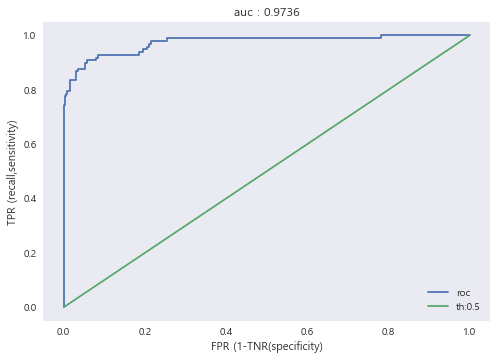

In [85]:
# Logistic Regression
lr_clf = LogisticRegression(random_state = 0)
lr_clf.fit(x_train, y_train)
pred_lr = lr_clf.predict(x_test)
proba_lr = lr_clf.predict_proba(x_test)

hist_u_lr = myscore(y_test, pred_lr, proba_lr, pr_curve=1, auc_curve=1)
hist_u_lr.insert(0,'hist_u_lr')
# Accuracy:0.821429  precision:1.000000, recall:0.642857, f1:0.782609, auc:0.884944

Accuracy:0.127308  precision:0.003322, recall:1.000000, f1:0.006622, auc:0.956764
[[ 4191 29401]
 [    0    98]]
3204 3204 3204


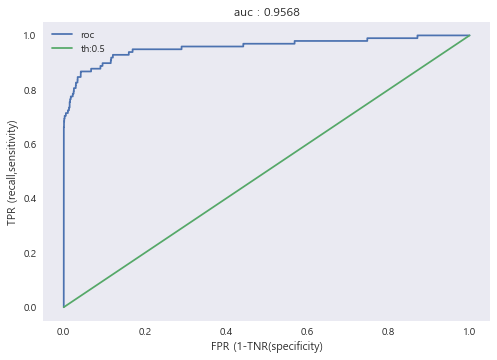

In [86]:
# LightGBM
lgbm = LGBMClassifier(boost_from_average=False)
lgbm.fit(x_train, y_train)
pred_dt = lgbm.predict(x_test)
proba_dt = lgbm.predict_proba(x_test)
hist_u_lb = myscore(y_test, pred_dt, proba_dt, pr_curve=1, auc_curve=1)
hist_u_lb.insert(0,'hist_u_lb')
#Accuracy:0.999438  precision:0.923077, recall:0.734694, f1:0.818182ㅠ, auc:0.968107

In [105]:
print('[정확도, 정밀도, 재현율, f1점수, auc]')
print(hist_tlogs_lr)  # Logistic Regression + Time remove + Log Transfrom + 이상치 제거
print()
print(hist_tlogs_lb)  # LightGBM + Time remove + Log Transfrom # 이상치 제거
print()
print(hist_u_lr)      # Logistic Regression + Time remove + Log Transfrom + 이상치 제거 + Undersampling
print()
print(hist_u_lb)      # LightGBM + Time remove + Log Transfrom # 이상치 제거 + Undersampling

[정확도, 정밀도, 재현율, f1점수, auc]
['hist_tlogs_lr', [0.9998515880083111, 1.0, 0.9489795918367347, 0.9738219895287958, 0.9920255551613358]]

['hist_tlogs_lb', [0.9997625408132977, 1.0, 0.9183673469387755, 0.9574468085106383, 0.9931147053963286]]

['hist_u_lr', [0.6884238646482636, 0.009156990465401681, 0.9897959183673469, 0.018146104199794223, 0.9735715136256932]]

['hist_u_lb', [0.12730780647076284, 0.0033221465134411336, 1.0, 0.00662229279994594, 0.9567635758756944]]


## 8. 오버 샘플링
- 이상치까지 제거한 데이터에 언더 샘플링 진행 후 성능 비교.

In [93]:
# 데이터 불러오기
card_df = pd.read_csv('./미니프로젝트/creditcard.csv')

In [94]:
# Time 컬럼 제거
card_df.drop(["Time"], inplace=True, axis=1)

# 이상치 제거
card_df = get_outlier(card_df,card_df_columns,0,2.0)

Int64Index([    18,    164,    290,   1158,   1632,   2178,   2464,   2682,
              2792,   2954,
            ...
            284479, 284516, 284517, 284536, 284561, 284631, 284649, 284772,
            284795, 284802],
           dtype='int64', length=4309)
Int64Index([    85,     89,    146,    174,    210,    225,    249,    401,
               450,    468,
            ...
            284426, 284434, 284447, 284448, 284476, 284496, 284497, 284528,
            284610, 284713],
           dtype='int64', length=5556)
Int64Index([  8464,  10036,  10644,  11374,  11738,  12975,  13034,  13115,
             13129,  13160,
            ...
            278901, 279411, 279629, 280949, 281787, 281789, 283149, 283315,
            283630, 284453],
           dtype='int64', length=252)
Int64Index([    83,    180,    351,    513,    608,    858,   2039,   2043,
              2170,   4018,
            ...
            284645, 284646, 284652, 284669, 284711, 284712, 284738, 284745,
            2

In [95]:
# Amount Log Transfrom
log_am = np.log1p(card_df['Amount'])
card_df.insert(29, 'L_am', log_am)
card_df.drop(["Amount"], inplace=True, axis=1)

In [96]:
# x, y
x_data = card_df.iloc[:,:-1]
y_data = card_df.iloc[:,-1]

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [97]:
# Oversmapling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
x_train_o, y_train_o = smote.fit_resample(x_train, y_train)

C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:0.981033  precision:0.129959, recall:0.969388, f1:0.229192, auc:0.991738
[[32956   636]
 [    3    95]]
576 576 576


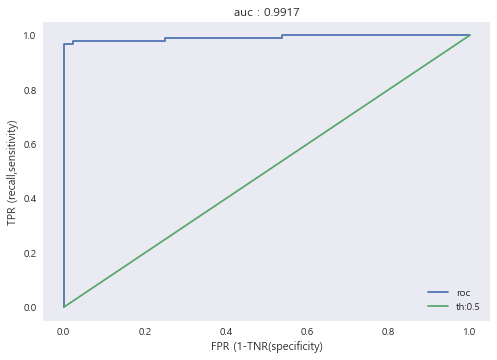

In [98]:
# Logistic Regression
lr_clf = LogisticRegression(random_state = 36)
lr_clf.fit(x_train_o,y_train_o)
pred_lr = lr_clf.predict(x_test)
proba_lr = lr_clf.predict_proba(x_test)
hist_o_lr = myscore(y_test, pred_lr, proba_lr, pr_curve=1, auc_curve=1)
hist_o_lr.insert(0,'hist_o_lr')

Accuracy:0.999555  precision:0.880734, recall:0.979592, f1:0.927536, auc:0.991797
[[33579    13]
 [    2    96]]
2647 2647 2647


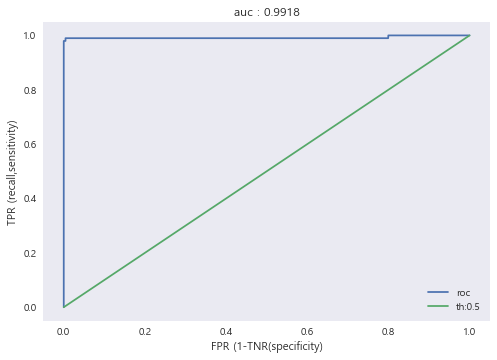

In [99]:
# LightGBM
lgbm = LGBMClassifier(boost_from_average=False)
lgbm.fit(x_train_o, y_train_o)
pred_dt = lgbm.predict(x_test)
proba_dt = lgbm.predict_proba(x_test)
hist_o_lb = myscore(y_test, pred_dt, proba_dt, pr_curve=1, auc_curve=1)
hist_o_lb.insert(0,'hist_o_lb')
#Accuracy:0.999438  precision:0.923077, recall:0.734694, f1:0.818182ㅠ, auc:0.968107

In [104]:
print('[정확도, 정밀도, 재현율, f1점수, auc]')
print(hist_tlogs_lr)  # Logistic Regression + Time remove + Log Transfrom + 이상치 제거
print()
print(hist_tlogs_lb)  # LightGBM + Time remove + Log Transfrom # 이상치 제거 
print()
print(hist_o_lr)      # Logistic Regression + Time remove + Log Transfrom + 이상치 제거 + Undersampling
print()
print(hist_o_lb)      # LightGBM + Time remove + Log Transfrom # 이상치 제거 + Undersampling

[정확도, 정밀도, 재현율, f1점수, auc]
['hist_tlogs_lr', [0.9998515880083111, 1.0, 0.9489795918367347, 0.9738219895287958, 0.9920255551613358]]

['hist_tlogs_lb', [0.9997625408132977, 1.0, 0.9183673469387755, 0.9574468085106383, 0.9931147053963286]]

['hist_o_lr', [0.981032947462155, 0.12995896032831739, 0.9693877551020408, 0.22919179734620024, 0.9917381932530097]]

['hist_o_lb', [0.9995547640249333, 0.8807339449541285, 0.9795918367346939, 0.927536231884058, 0.9917972755903981]]


# 결론
- 금융 고객 데이터 보호 상의 이유로 피쳐값을 PCA차원축소를 진행한 데이터로 프로젝트를 진행할 경우 직관적으로 판단하기에 어려운 점이 많아 각 피쳐간 상관관계를 찾아내기 어려웠습니다.
- Under/Up Sampling :  
극도로 불균형한 데이터(레이블)값을 해소하기 위해 undersampling, upsamplingdmf을 진행.
- Sampling을 시도해봤지만, 결과적으로 Sampling 하지 않은 데이터의 성능이 더 좋았다.
- undersampling의 경우 너무 많은 정상 데이터을 감소시키기떄문에 제대로 된 학습이 어렵다고 판단했습니다.
